Уровень 0

Диагональная, ортогональная, но не единичная

In [9]:
import numpy as np
from math import cos, sin, pi
tetha = 130 * 180 / pi
A = np.array([[cos(tetha), sin(tetha)],
             [sin(tetha), cos(tetha)]])
A

array([[-0.9651331 ,  0.26175964],
       [ 0.26175964, -0.9651331 ]])

In [10]:
np.dot(A,A.T)

array([[ 1.        , -0.50526578],
       [-0.50526578,  1.        ]])

Верхнетреугольная, ортогональная

In [12]:
B = np.eye(3)
np.dot(B,B.T)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Нижнетреугольная, ортогональная

In [16]:
C = np.eye(3)
np.dot(C,C.T)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Матрица, у которой определитель = 1, и все элементы не равны 0

In [17]:
D = np.array([[1, 1, 1], [1, 2, 3], [1, 3, 6]])
D

array([[1, 1, 1],
       [1, 2, 3],
       [1, 3, 6]])

In [18]:
np.linalg.det(D)

1.0

Найдите собственные значения и собственные вектора матриц:

In [19]:
m = np.array([[2, 2], [1, 3]])
print(m)
w, v = np.linalg.eig(m)
for i in range(len(w)):
    print("собственное значение " + str(w[i]))
    print("собственный вектор " + str(v[:,i]))

[[2 2]
 [1 3]]
собственное значение 1.0
собственный вектор [-0.89442719  0.4472136 ]
собственное значение 4.0
собственный вектор [-0.70710678 -0.70710678]


Уровень 1

In [21]:
m = np.array([[1, 2], [2,3]])

w, v = np.linalg.eig(m)
D_sp = np.diag(w)
S_sp = v.T
print(S_sp.T, D_sp, S_sp, sep = '\n\n')

[[-0.85065081 -0.52573111]
 [ 0.52573111 -0.85065081]]

[[-0.23606798  0.        ]
 [ 0.          4.23606798]]

[[-0.85065081  0.52573111]
 [-0.52573111 -0.85065081]]


In [22]:
np.dot(np.dot(S_sp.T, D_sp),S_sp) # доказательство того, что это спектральное разложение

array([[1., 2.],
       [2., 3.]])

In [23]:
from sklearn.datasets import load_digits

In [24]:
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [26]:
X = digits.data
y = digits.target

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


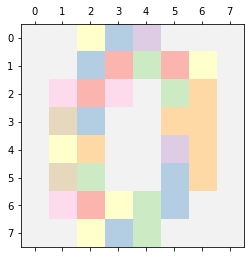

In [33]:
import matplotlib.pyplot as plt
image = X[0]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'Pastel1_r')
plt.show()

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components = 64)
pca.fit(X)

PCA(n_components=64)

In [37]:
pca.explained_variance_ratio_ #объясненная дисперсия

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

Text(0, 0.5, 'общая объясненная дисперсия')

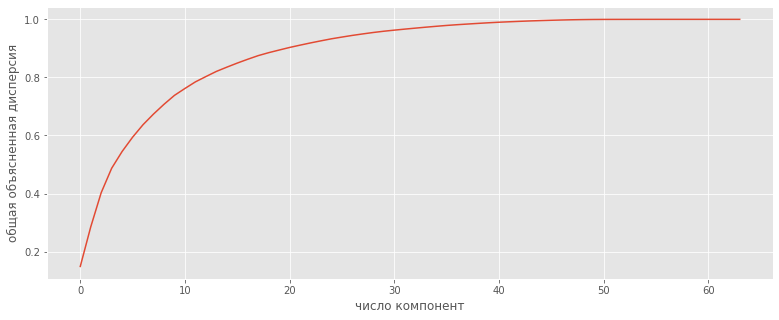

In [39]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (13,5)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('число компонент')
plt.ylabel('общая объясненная дисперсия')

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
k = range(1,64)
scores = []
for n in k: 
    pca = PCA(n_components=n)
    X_pred = pca.inverse_transform(pca.fit_transform(X))
    scores.append(mean_squared_error(X, X_pred))

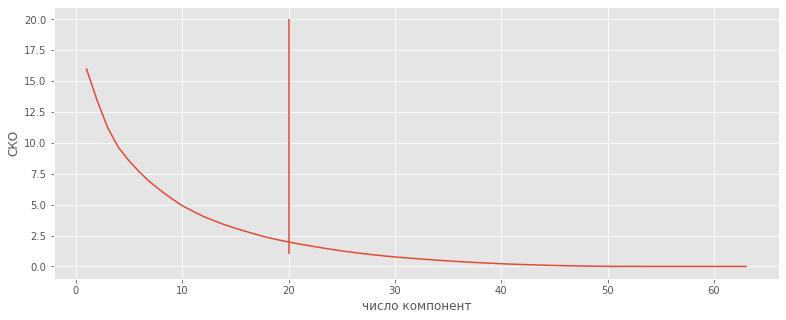

In [42]:
plt.plot(k,scores)
plt.xlabel('число компонент')
plt.ylabel('СКО')
plt.vlines(20,1,20)

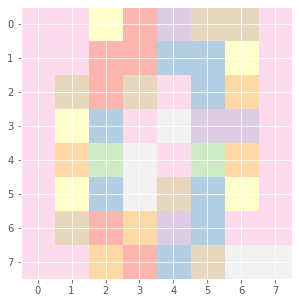

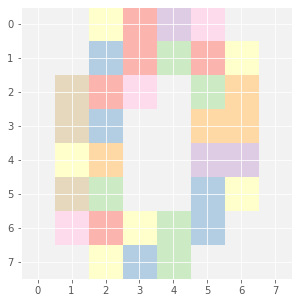

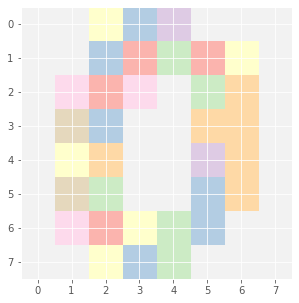

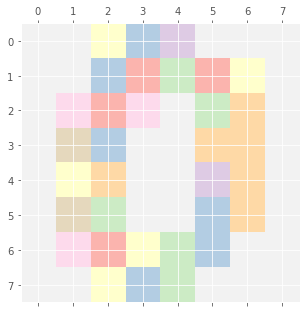

In [43]:
import pylab as pl
plt.rcParams['figure.figsize'] = (6,5)
for n in (20,40,64):
    pca = PCA(n_components = n)
    X1 = pca.inverse_transform(pca.fit_transform(X))
    image = X1[0]
    image = image.reshape((8, 8))
    pl.imshow(image, cmap='Pastel1_r')
    pl.show()
    
image = X[0] #Исходное изображение
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'Pastel1_r')
plt.show()